## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>

## EDA on Crime rates in Boston city
Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.
Records are from year  15th June 2015 to 13th October 2019.
<a id=section1></a>
## 1. Problem Statement
What types of crimes are most common? Where are different types of crimes most likely to occur? Does the frequency of crimes change over the day? Week? Year?

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 20                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

<a id=section3></a>
## 3. Loading Data
** Data is collected from this site.** https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system 

Crime incident reports are provided by **Boston Police Department (BPD)** to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in **June of 2015**.

### Importing Boston City Crime Dataset

In [3]:
dfcrime = pd.read_csv('BostonCrimeData.csv', encoding='latin-1') ###../input/bostoncrimedata/

In [4]:
dfcrime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,10/16/2019 0:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,10/23/2019 0:00,2019,10,Wednesday,0,NaN,GIBSON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,11/22/2019 7:50,2019,11,Friday,7,NaN,BROOKS ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I92089785,3005,NaN,SICK ASSIST,E13,574,0,11/5/2019 18:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
4,I90583827,1402,NaN,VANDALISM,E18,498,0,11/2/2019 5:09,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"


In [5]:
dfcrime.shape

(446708, 17)

<a id=section301></a>
### Description of the Dataset

> **Column description**
                                                                |

* [incident_num] [varchar](20) NOT NULL 	 Internal BPD report number
* [offense_code][varchar](25) NULL	       Numerical code of offense description
* [Offense_Code_Group_Description][varchar](80) NULL, 	Internal categorization of [offense_description]
* [Offense_Description][varchar](80) NULL,	Primary descriptor of incident
* [district] [varchar](10) NULL,	What district the crime was reported in
* [reporting_area] [varchar](10) NULL,	RA number associated with the where the crime was reported from.
* [shooting][char] (1) NULL,	Indicated a shooting took place.
* [occurred_on] [datetime2](7) NULL,	Earliest date and time the incident could have taken place
* [UCR_Part] [varchar](25) NULL,	Universal Crime Reporting Part number (1,2, 3)
* [street] [varchar](50) NULL,	Street name the incident took place

In [6]:
dfcrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446708 entries, 0 to 446707
Data columns (total 17 columns):
INCIDENT_NUMBER        446708 non-null object
OFFENSE_CODE           446708 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    446708 non-null object
DISTRICT               444424 non-null object
REPORTING_AREA         446708 non-null object
SHOOTING               21615 non-null object
OCCURRED_ON_DATE       446708 non-null object
YEAR                   446708 non-null int64
MONTH                  446708 non-null int64
DAY_OF_WEEK            446708 non-null object
HOUR                   446708 non-null int64
UCR_PART               426730 non-null object
STREET                 432288 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               446708 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 57.9+ MB


Using ```info``` we get following insight from **data****
* There are **446708** rows and **17** columns
* missing values for Offence code group, district, shooting, street, lat and long.
* **11** columns are of type **object**, **2** columns are of **float** type and **4** are **integer** column

In [7]:
dfcrime.describe(include = 'all')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,446708,446708.000000,426840,446708,444424,446708,21615,446708,446708.000000,446708.000000,446708,446708.000000,426730,432288,399636.000000,399636.000000,446708
unique,395464,NaN,67,283,13,880,3,324204,NaN,NaN,7,NaN,4,5049,NaN,NaN,18934
top,I152071596,NaN,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,0,8/1/2016 0:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,20,NaN,49603,27073,71077,29605,19702,33,NaN,NaN,68128,NaN,214043,20945,NaN,NaN,47072
mean,NaN,2330.784871,NaN,NaN,NaN,NaN,NaN,NaN,2017.177239,6.826578,NaN,13.105404,NaN,NaN,42.221634,-70.920432,NaN
std,NaN,1182.112882,NaN,NaN,NaN,NaN,NaN,NaN,1.315031,3.316647,NaN,6.310254,NaN,NaN,2.084320,3.371579,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-71.178674,NaN
25%,NaN,1102.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,4.000000,NaN,9.000000,NaN,NaN,42.297105,-71.097223,NaN
50%,NaN,3002.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,7.000000,NaN,14.000000,NaN,NaN,42.325538,-71.077619,NaN
75%,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,10.000000,NaN,18.000000,NaN,NaN,42.348546,-71.062583,NaN


> **Using ```describe``` we get following insight**
* 6 numeric columns in the dataset and 11 are categorical columns
* there is an incident number **I152071596** which is appearing 20 times in the dataset
* **OFFENSE_CODE_GROUP** there **67** unique values. Most frequent offence is Motor Vehicle Accident Response which has happened 49603 times in Boston.
* OFFENSE_DESCRIPTION : SICK/INJURED/MEDICAL - PERSON is the most frequent offence occured 27073 times
* **71077** incident are reported in B2 district out of **13** districts in Boston
* Shooting has **3** unique values. 
* **33** incidence occured on **8/1/2016 0:00**
> * Boston city crime data is available from Year** 2015 to 2019**
* **68128** incidence occured on **Friday**
* **20945** of the crimes occured in **Washingtone ST** street
* For Lat and Long there are Outliers  like **-1.000000** which we need to clean

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [8]:
import pandas_profiling 
profile = dfcrime.profile_report(title="Bostons's Crime data Profiling before Data Preprocessing")
profile.to_file(output_file="Boston's_Crime_Date_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 17
- Number of observations: 446708
- Missing cells: 575787 (7.6%)
- Duplicate rows	751 (0.2%)

**Warnings**
* Dataset has **751 (0.2%) duplicate** rows	
* HOUR has 21843 **(4.9%)** zeros	**=> which could possibly mean that there are incident reported at 00.00.* Need to check randomly this data to see the possibility.***
* INCIDENT_NUMBER has a high cardinality: 395464 distinct values **=> It means that there are duplicate values in incident number. Ideally this column should have not duplicate values. Need to analyse why this column have duplicates and remove duplicate values if it is not needed **
* Lat and long has **47072 (10.5%) missing** values	**=> Need to remove missing values **
* **OFFENSE_CODE_GROUP** has **19868 (4.4%) **=> Need to remove missing values **
* **SHOOTING** has **425093 (95.2%) missing** values **=> *We must drop this column**
* STREET has **14420 (3.2%) missing** values	**=> Need to remove missing values **
* UCR_PART has **19978 (4.5%)** **missing** values **=> Need to remove missing values **

- > **Friday** has **15.7% **of crimes occured followed by **thursday** **14.6%**
- > **B2 district** have **15.9%** crimes oocured followed by **C11(13.4%)**
- > Majority of the crimes occured duing **17,18,16 hours** of the day
- > In Location column are there are **47072** columns with **(0.00000000, 0.00000000)** values which is because there are **47072 lat and log** which are **null**. **Need to remove clean this data**
- > **Motor Vehicle Accident Response** offence is frequent in Boston with freq of **11.1%** follwed by Larceny which is 7.8%
- > **6.6%** of the reporting area have missing values.


<a id=section4></a>
## 4. Data Preprocessing

- Renamed columns names in the dataframe to title case as there are few columns names in caps and few are in lower case

In [9]:
## Rename columns names to title case as there are few columns names in caps and few are in lower case
dfcrime.rename(str.title, axis='columns', inplace = True)

   - There are **751** duplicate rows. **Remove** them using ```drop_duplicates``` command

In [10]:
dfcrime.drop_duplicates(inplace = True) ## There are 751 duplicate rows. Remove them using drop_duplicates command

In [11]:
dfcrime.shape

(445957, 17)

In [12]:
dfcrime[dfcrime.Hour == 0]['Hour'].count()

21753

- From the **Occurred_On_Date** column extract the time in HH: MM format and **Drop** the **Hour** column because it is not showing the time in **HH: MM** format due to this for incident occured between 12 AM - 1AM it is showing 0 values. Hence there are 21753 records which has Hour = 0.

In [13]:
##From the Occurred_On_Date column extract the time in HH: MM format

'''dfcrime['Occurred_On_Date'] = pd.to_datetime(dfcrime['Occurred_On_Date']) 
dfcrime.insert(11,'TimeStamp',dfcrime['Occurred_On_Date'].dt.strftime('%H:%M'))'''


"dfcrime['Occurred_On_Date'] = pd.to_datetime(dfcrime['Occurred_On_Date']) \ndfcrime.insert(11,'TimeStamp',dfcrime['Occurred_On_Date'].dt.strftime('%H:%M'))"

- Drop the Shooting because it has 95% missing values.
- Drop the all the rows with **NaN** values to get the unique rows.

In [14]:
dfcrime.drop(['Shooting'],axis = 1, inplace = True) 
## Drop the Shooting column first since it as 95% null values then use the dropna to remove null rows

dfcrime.dropna(inplace = True)
dfcrime.shape ## check shape of the dataframe post deleting NaN rows

(395675, 16)

> Verify that the **NaN** values are removed from the data

In [15]:
dfcrime.head(20) ## verify that the NaN values are removed from the data

,Incident_Number,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,Ucr_Part,Street,Lat,Long,Location
8,I192082859,724,Auto Theft,AUTO THEFT,E18,519,10/13/2019 9:28,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
9,I192082751,724,Auto Theft,AUTO THEFT,E18,493,10/12/2019 20:11,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
10,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,10/12/2019 15:12,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"
11,I192082577,724,Auto Theft,AUTO THEFT,D4,130,10/12/2019 4:41,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)"
12,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,10/2/2019 8:08,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)"
13,I192078648,3114,Investigate Property,INVESTIGATE PROPERTY,B3,427,9/29/2019 6:39,2019,9,Sunday,6,Part Three,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
14,I192078647,3115,Investigate Person,INVESTIGATE PERSON,A1,,9/29/2019 3:45,2019,9,Sunday,3,Part Three,NASHUA ST,42.367690,-71.065863,"(42.36769032, -71.06586347)"
15,I192078645,3301,Verbal Disputes,VERBAL DISPUTE,B3,450,9/29/2019 6:00,2019,9,Sunday,6,Part Three,ASPINWALL RD,42.291816,-71.072441,"(42.29181580, -71.07244098)"
16,I192078645,1402,Vandalism,VANDALISM,B3,450,9/29/2019 6:00,2019,9,Sunday,6,Part Two,ASPINWALL RD,42.291816,-71.072441,"(42.29181580, -71.07244098)"
17,I192078642,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,D4,269,9/29/2019 5:50,2019,9,Sunday,5,Part Three,ALBANY ST,42.332419,-71.075013,"(42.33241896, -71.07501315)"


> For Lat and Long there are Outliers like -1.000000 which we need to clean. It is observed that if Lat is -1.000000 then long is also -1.000000. Hence by removing the rows with Lat -1.000000 will also remove the rows with Long -1.000000.

In [16]:
## delete rows with  lat and Lon  - 1.000000 .
dfcrime.drop(dfcrime[dfcrime['Lat'] == -1.000000].index, inplace = True) 


From the **Pandas profiling report** we have observed that there are **duplicate incident number** in the data set . Analyse this data to understand the reason behing the duplicate incident numbers 

|  Value | Count  | Frequency (%)  |
| :------------: | :------------: | :------------: |
|I152071596   | 20  | 0.1%  |
|I192025403| 15  |  0.1% |
|  I182051210 |  14 | 0.1%  |
| I162067346  | 14  | 0.1%  |
| I162030584  | 13  |  0.1% |
| I130041200-00  |13   |  0.1% |
| I182093742  |  12 | 0.1%  |
| I152097957  |  12 |  0.1% |
| I182044546  |  12 |  0.1% |


In [17]:
DfduplicateincidentNumber = dfcrime.Incident_Number.isin(['I152071596','I192025403'])

In [18]:
dfcrime[DfduplicateincidentNumber]

,Incident_Number,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,Ucr_Part,Street,Lat,Long,Location
50034,I192025403,1510,Firearm Violations,WEAPON - FIREARM - OTHER VIOLATION,B3,469,4/6/2019 16:56,2019,4,Saturday,16,Part Two,MATTAPAN ST,42.277325,-71.094831,"(42.27732507, -71.09483139)"
50037,I192025403,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,469,4/6/2019 16:56,2019,4,Saturday,16,Part One,MATTAPAN ST,42.277325,-71.094831,"(42.27732507, -71.09483139)"
50041,I192025403,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,469,4/6/2019 16:56,2019,4,Saturday,16,Part One,MATTAPAN ST,42.277325,-71.094831,"(42.27732507, -71.09483139)"
50044,I192025403,3125,Warrant Arrests,WARRANT ARREST,B3,469,4/6/2019 16:56,2019,4,Saturday,16,Part Three,MATTAPAN ST,42.277325,-71.094831,"(42.27732507, -71.09483139)"
50047,I192025403,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",B3,469,4/6/2019 16:56,2019,4,Saturday,16,Part Two,MATTAPAN ST,42.277325,-71.094831,"(42.27732507, -71.09483139)"
407049,I152071596,3001,Medical Assistance,DEATH INVESTIGATION,B2,326,8/29/2015 2:42,2015,8,Saturday,2,Part Three,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
407053,I152071596,3503,Missing Person Located,MISSING PERSON - NOT REPORTED - LOCATED,B2,326,8/29/2015 2:42,2015,8,Saturday,2,Part Three,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
407057,I152071596,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,8/29/2015 2:42,2015,8,Saturday,2,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
407061,I152071596,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,326,8/29/2015 2:42,2015,8,Saturday,2,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
407065,I152071596,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,326,8/29/2015 2:42,2015,8,Saturday,2,Part Two,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"


<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [19]:
import pandas_profiling 
profile = dfcrime.profile_report(title="Bostons's Crime data Profiling after Data Preprocessing")
profile.to_file(output_file="Boston's_Crime_Date_profiling_After_preprocessing.html")

In [20]:
dfcrime.describe(include = 'all')

,Incident_Number,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,Ucr_Part,Street,Lat,Long,Location
count,395471,395471.000000,395471,395471,395471,395471,395471,395471.000000,395471.000000,395471,395471.000000,395471,395471,395471.000000,395471.000000,395471
unique,349485,NaN,63,236,12,879,288928,NaN,NaN,7,NaN,4,3919,NaN,NaN,18555
top,I162030584,NaN,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,111,6/1/2017 0:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(42.34862382, -71.08277637)"
freq,12,NaN,40462,24997,62614,3191,32,NaN,NaN,60217,NaN,196778,18725,NaN,NaN,1670
mean,NaN,2304.857398,NaN,NaN,NaN,NaN,NaN,2017.085114,6.645860,NaN,13.124075,NaN,NaN,42.322115,-71.083013,NaN
std,NaN,1178.946928,NaN,NaN,NaN,NaN,NaN,1.289488,3.285107,NaN,6.281466,NaN,NaN,0.031975,0.029772,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,2015.000000,1.000000,NaN,0.000000,NaN,NaN,42.232413,-71.178674,NaN
25%,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,2016.000000,4.000000,NaN,9.000000,NaN,NaN,42.297261,-71.097437,NaN
50%,NaN,2907.000000,NaN,NaN,NaN,NaN,NaN,2017.000000,7.000000,NaN,14.000000,NaN,NaN,42.325574,-71.077665,NaN
75%,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,2018.000000,9.000000,NaN,18.000000,NaN,NaN,42.348624,-71.062599,NaN


In [21]:
dfcrime.shape

(395471, 16)

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 

<a id=section501></a>
## 5.1 Analysis Based on UCR Types of the Crime.
 

<a id=section50101></a>
### 5.1.1 How many types of UCR crimes in Boston?

In [22]:
dfcrime.Ucr_Part.value_counts()

Part Three    196778
Part Two      120525
Part One      76650 
Other         1518  
Name: Ucr_Part, dtype: int64

> There are majorly  **3 types** of **Uniform Crime Reporting(UCR)** crimes. **Part I, Part II and Part III**. Let us analyse each of these crimes in detail to know the **patterns and trends** of the crime **year wise, day wise and hour wise**

<a id=section50102></a>
### 5.1.2 Which types of UCR Crimes are frequent in Boston?

Text(0.5, 1.0, 'Pie Chart showing the % of UCR Part Crimes')

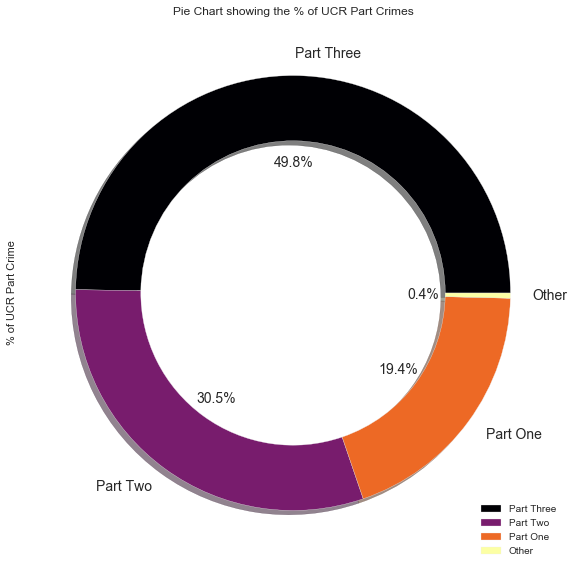

In [23]:
dfcrime['Ucr_Part'].value_counts().plot(kind = 'pie', fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.30), 
                                       shadow=True,figsize=(10,10), cmap='inferno', legend=True)
plt.ylabel('% of UCR Part Crime')
plt.title('Pie Chart showing the % of UCR Part Crimes')

- From the above __donut plot__ we can see the __share__ of each UCR Crime types in the data.
<br> <br>
  - **Part Three** crimes are **49.8%** in Boston where the **most serious Part One** Crime is **19.4%** from the **year 2015 to 2019**

In [24]:
UCRCrimesType = list(dfcrime['Ucr_Part'].unique()) ## Create the list of UCR Crime Types

<a id=section502></a>
## 5.2 Detailed analysis of UCR Part One types of the Crime.
 

<a id=section50201></a>
### 5.2.1 Which is Offence is most common/Frequent Under UCR Part One Crime of Boston?

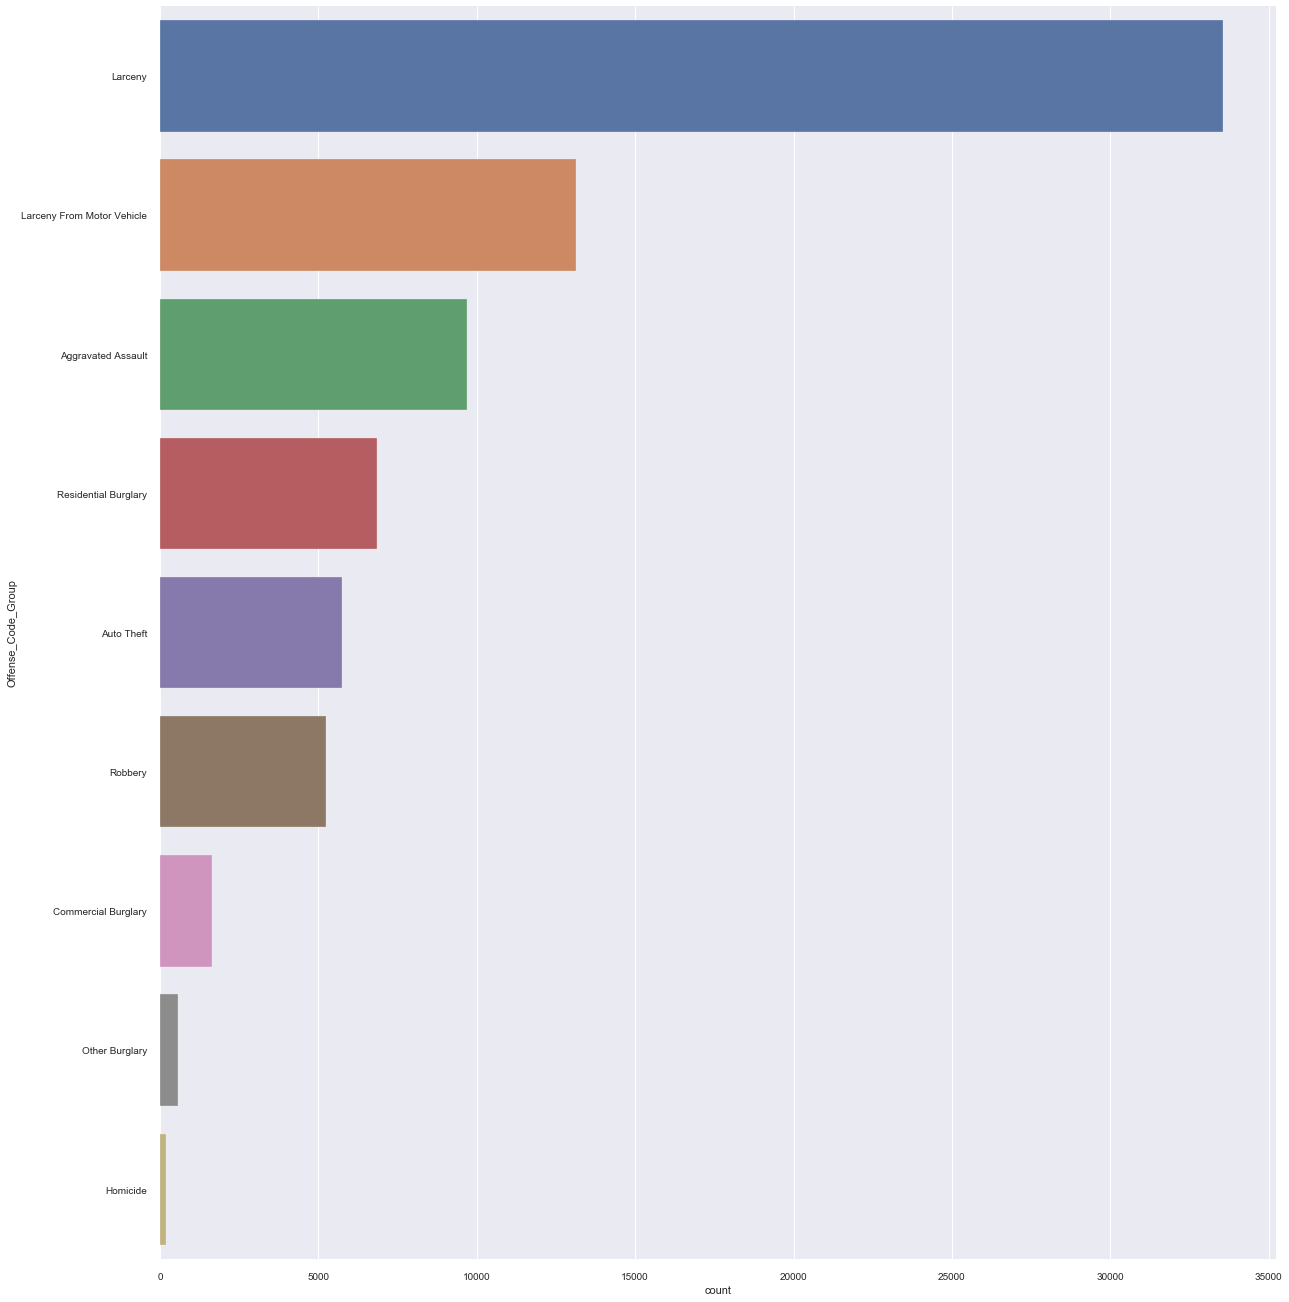

In [25]:
##for ucr_part in UCRCrimesType:
dfUCRPartone = dfcrime[dfcrime.Ucr_Part == 'Part One']
ax = sns.catplot(y='Offense_Code_Group',kind='count',height=18,order=dfUCRPartone.Offense_Code_Group.value_counts().index,data=dfUCRPartone)
plt.ylabel('Offense_Code_Group')
plt.savefig('Sns Plot per UCR type Part One offense count')
    

> From the above sns plot it is clear it **Larceny** is most frequent crime in Boston under **Part One** UCR category crimes.

<a id=section50202></a>
### 5.2.2 In Which District of Boston Larceny crime count is high?

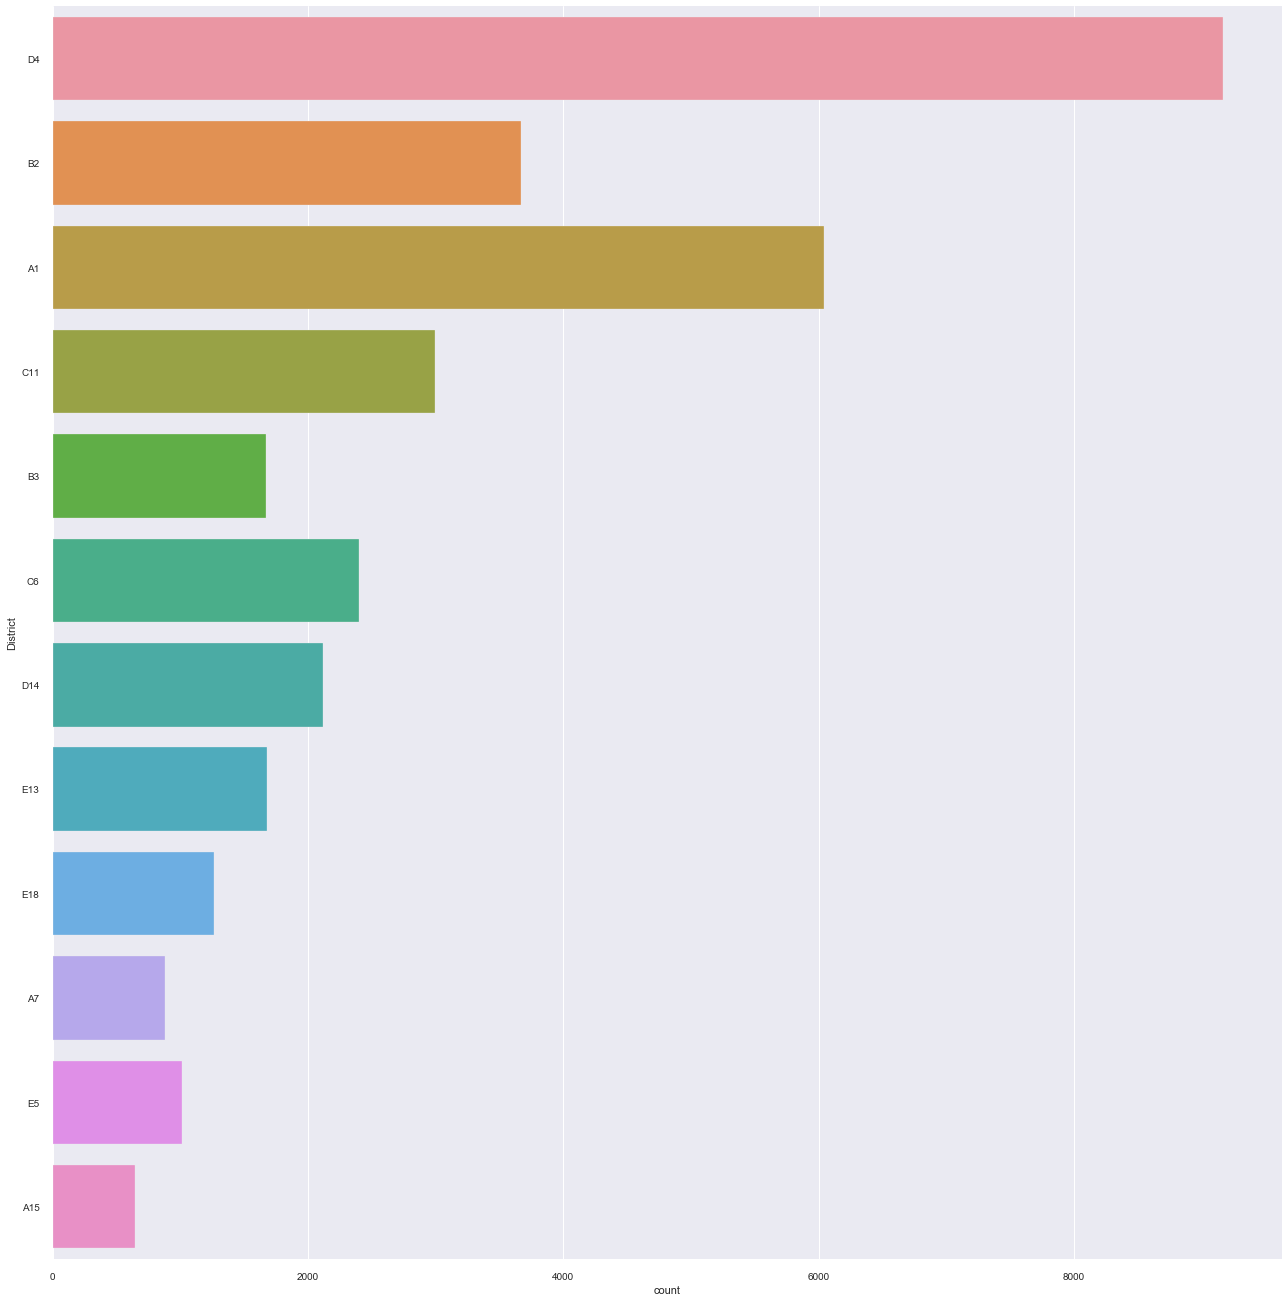

In [26]:
dfLarcenyCrime = dfUCRPartone[dfUCRPartone.Offense_Code_Group == 'Larceny']
sns.catplot(y='District',kind='count',height=18,order=dfUCRPartone.District.value_counts().index,data=dfLarcenyCrime)

> In **D4 District Larceny crime** count is quite **high** compared to **A1 and B2**. 

<a id=section50203></a>
### 5.2.3 Which District in Boston have the highest UCR Part One Crime?

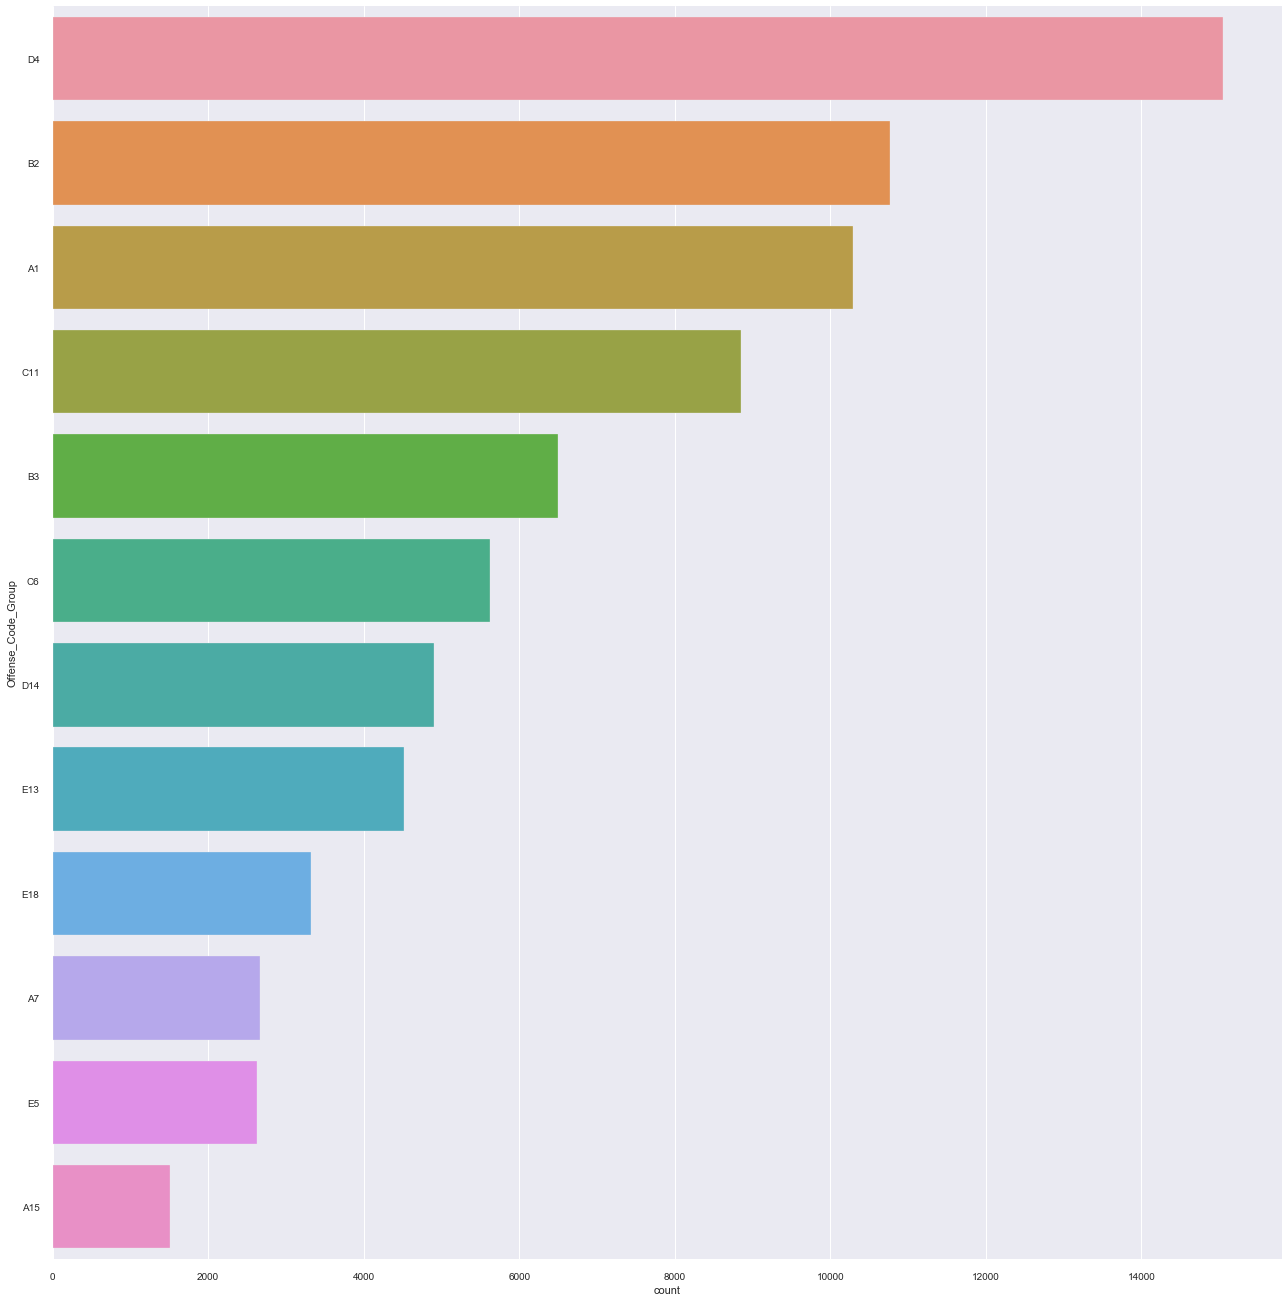

In [27]:
ax = sns.catplot(y='District',kind='count',height=18,order=dfUCRPartone.District.value_counts().index,data=dfUCRPartone)
plt.ylabel('Offense_Code_Group')
plt.savefig('Sns Plot per UCR type Part One offense count')

> In **D4 District UCR Part One crime** count is quite **high** compared to **A1 and B2**. 

<a id=section50204></a>
### 5.2.4 In Which Year the UCR Part One Crime rate is hign in Boston?

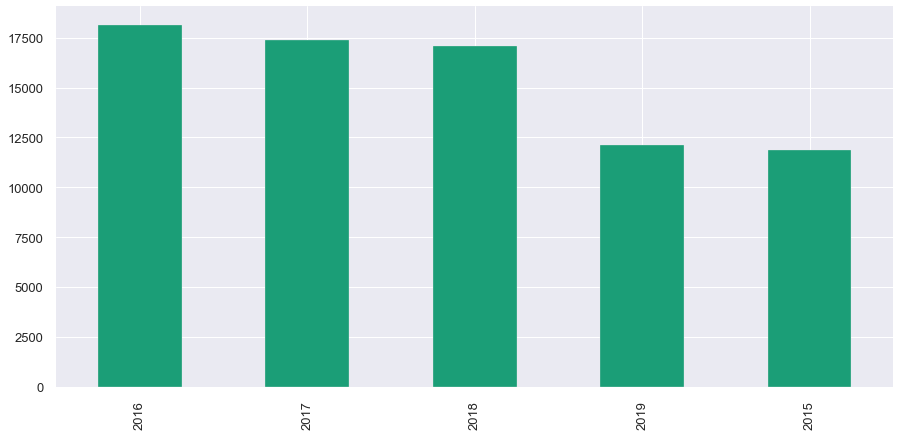

In [28]:
dfUCRPartone['Year'].value_counts().plot(kind = 'bar',figsize=(15,7), colormap='Dark2', fontsize=13)

> From the above graph we can get an insight that in** year 2016** the **UCR Part One** Crime rate is **slightly above** as compared to **year 2017 & 2018**

In [29]:
print(dfUCRPartone[dfUCRPartone.Year == 2019]['Occurred_On_Date'].max())

9/9/2019 9:51


In [30]:
print(dfUCRPartone[dfUCRPartone.Year == 2015]['Occurred_On_Date'].min())

10/1/2015 0:00


> We have the data from **15th June 2015 to 13th October 2019**. For year 2015 and year 2019 crime rate is appearing low on the bar graph hence we can skip these 2 years for our analysis and will focus more on the data which is **between year 2016- 2018**.

<a id=section5020401></a>
#### 5.2.4.1 In  Year 2016 which Offense is more frequent in Boston and In which district?

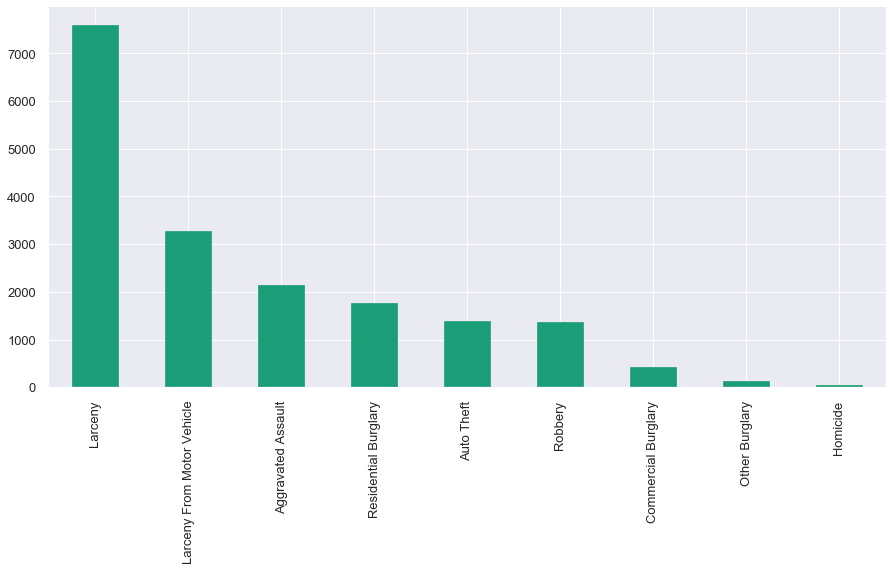

In [31]:
dfUCRPartone[dfUCRPartone['Year'] == 2016]['Offense_Code_Group'].value_counts().plot(kind = 'bar',figsize=(15,7), colormap='Dark2', fontsize=13)

> Here we get an interesting insight from the above graph, It shows that **Larceny** is the **most frequent crime in Year 2016**. With this we can confirm our insight from **section 5.2.1 where we found that Larceny Offence is most common/Frequent Under UCR Part One Crime of Boston**. Now let see in which **district of Boston in 2016 Larceny Crime rate is high**

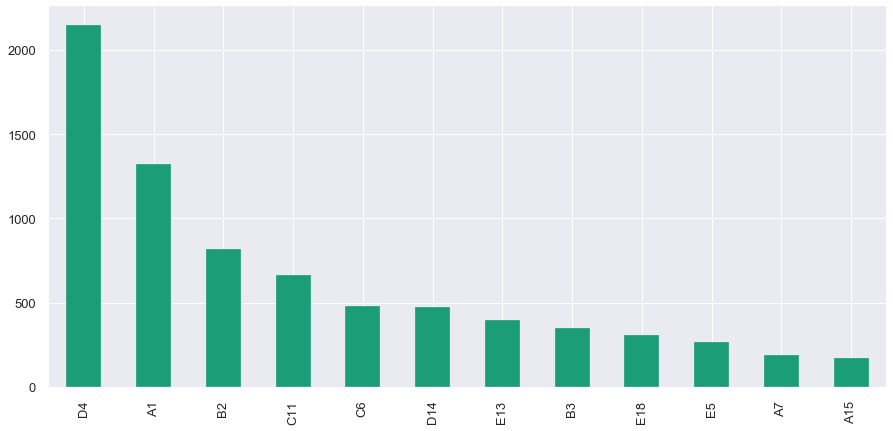

In [32]:
dfUCRPartone[(dfUCRPartone.Offense_Code_Group == 'Larceny') & (dfUCRPartone.Year == 2016)]['District'].value_counts().plot(kind = 'bar',figsize=(15,7), colormap='Dark2', fontsize=13)

> From the above graph we can see that **D4 District** has the **highest Larceny crime rate** followed by **A1 and B2 district in year 2016**. 

<a id=section50205></a>
### 5.2.5 In Which Month the UCR Part One Crime rate is high in Boston?

Text(-1.4499999999999744, 0.5, 'Count')

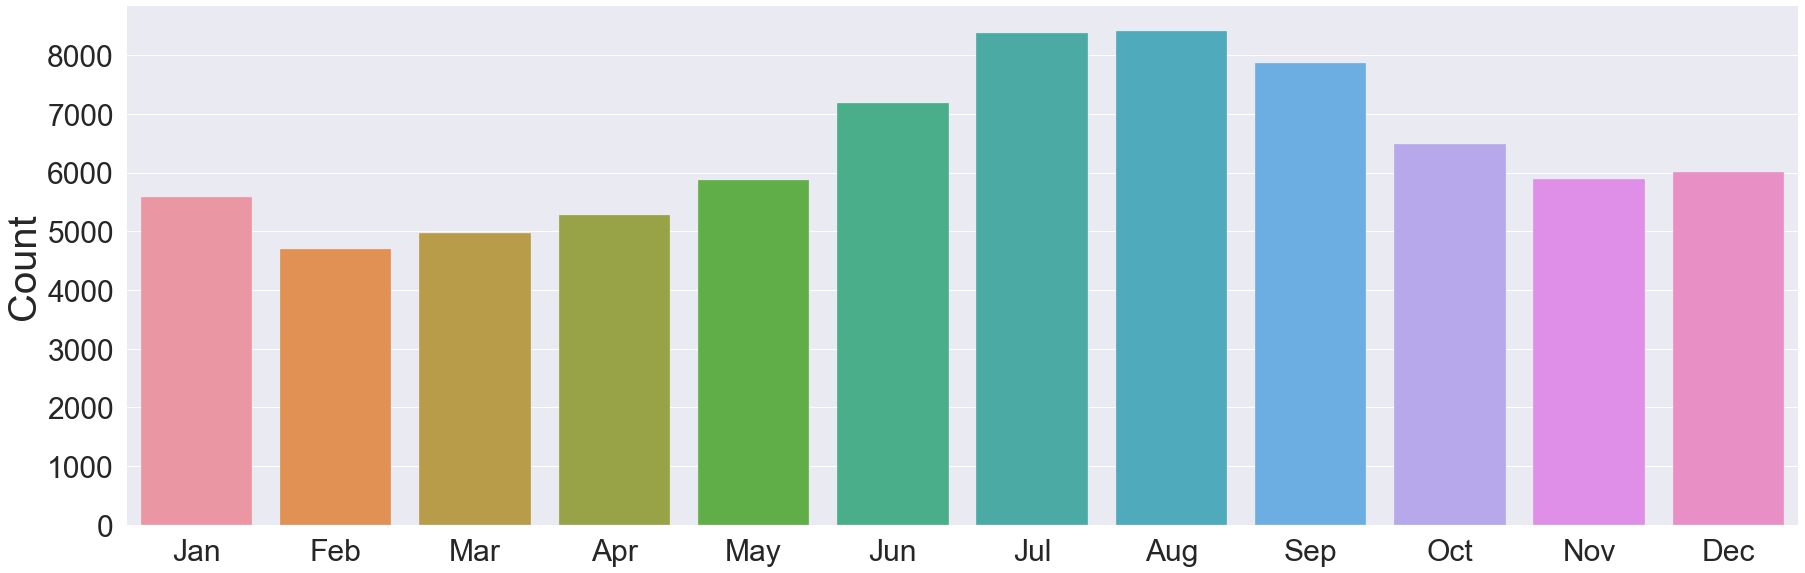

In [33]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='Month',kind='count',height=8,aspect=3,data=dfUCRPartone)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

> The month also seems to have some influence, with the **winter months of February-April** having the **lowest crime rates**, and the **summer/early fall months of June-October** having the **highest crime rates**. 

<a id=section50206></a>
### 5.2.6 In Which day of year the UCR Part One Crime rate is hign in Boston?

Text(-7.074999999999974, 0.5, 'Count')

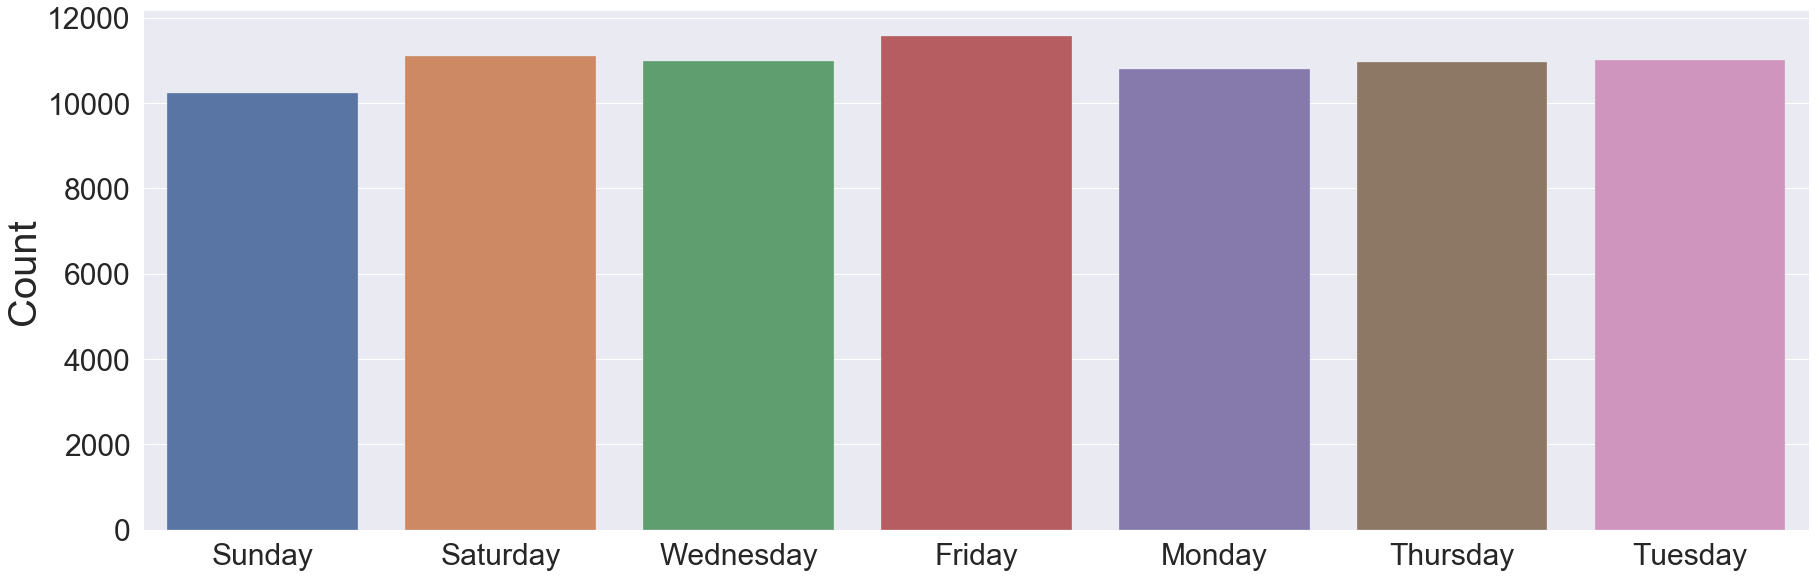

In [34]:
sns.catplot(x='Day_Of_Week',kind='count',height=8,aspect=3,data=dfUCRPartone)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

 > There is some variation across days of the week, with **Friday** having the **highest crime rate** and **Sunday** having the lowest.

<a id=section50207></a>
### 5.2.7 During which Hour of the date UCR Part One Crime rate is hign in Boston?

Text(-1.4499999999999744, 0.5, 'Count')

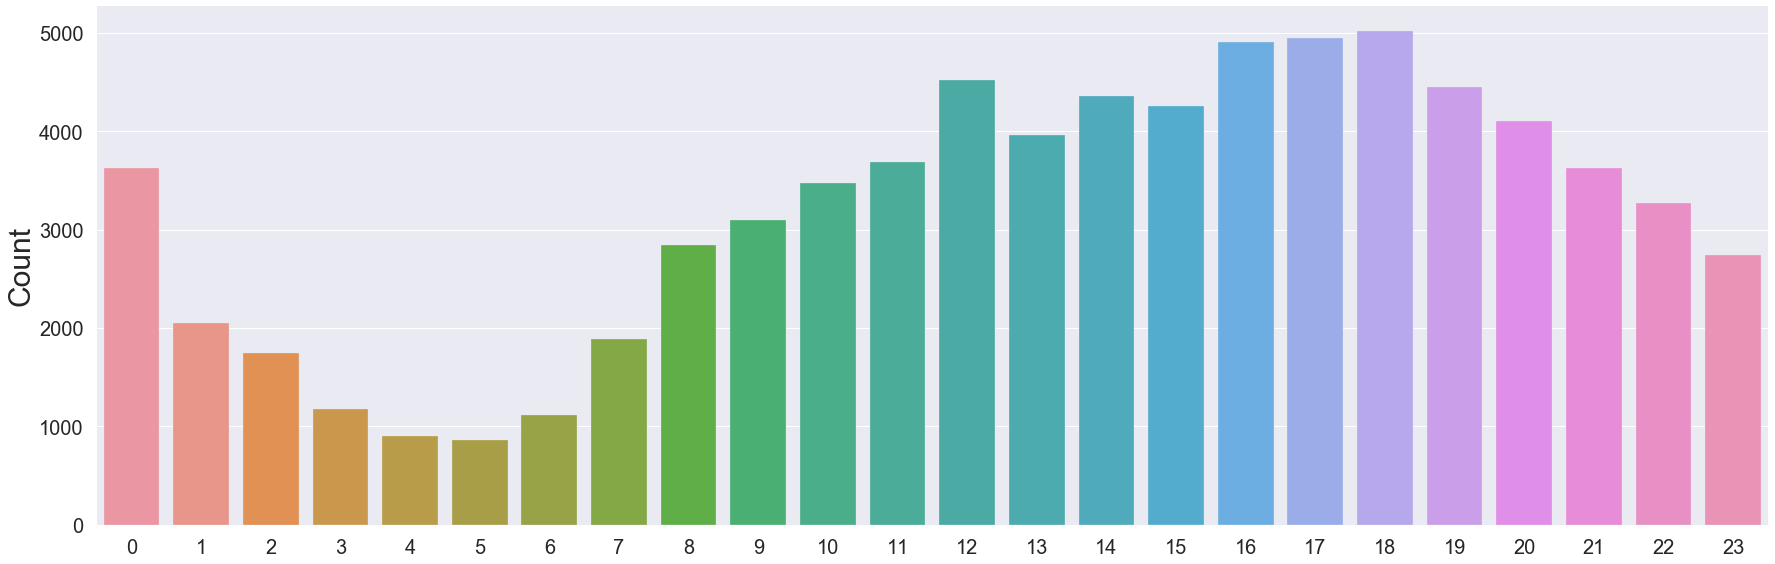

In [35]:
sns.catplot(x='Hour',kind='count',height=8,aspect=3,data=dfUCRPartone)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=30)

> UCR Part One Crimes rates are low between **1-8 in the morning**, and gradually rise throughout the day. Crime rate is at **peak time during evening which is between 4 pm - 7Pm** . 

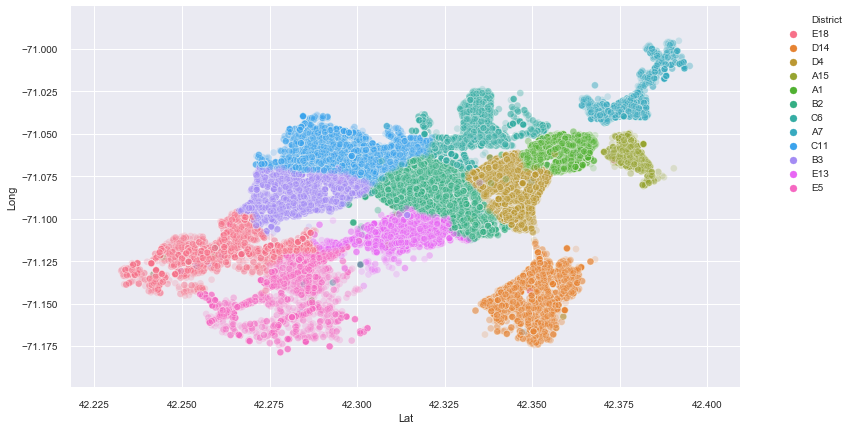

In [36]:
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x='Lat',
               y='Long',
                hue='District',
                alpha=0.2,
               data=dfUCRPartone)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

> We can now associate **high** crime rates with particular districts, most noteably **A1 and D4**, which correspond to the most crowded areas of **downtown Boston**. 

<a id=section503></a>
## 5.3 Detailed analysis of UCR Part Two types of the Crime.

<a id=section50301></a>
### 5.3.1 Which is Offence is most common/Frequent Under UCR Part Two Crime of Boston?

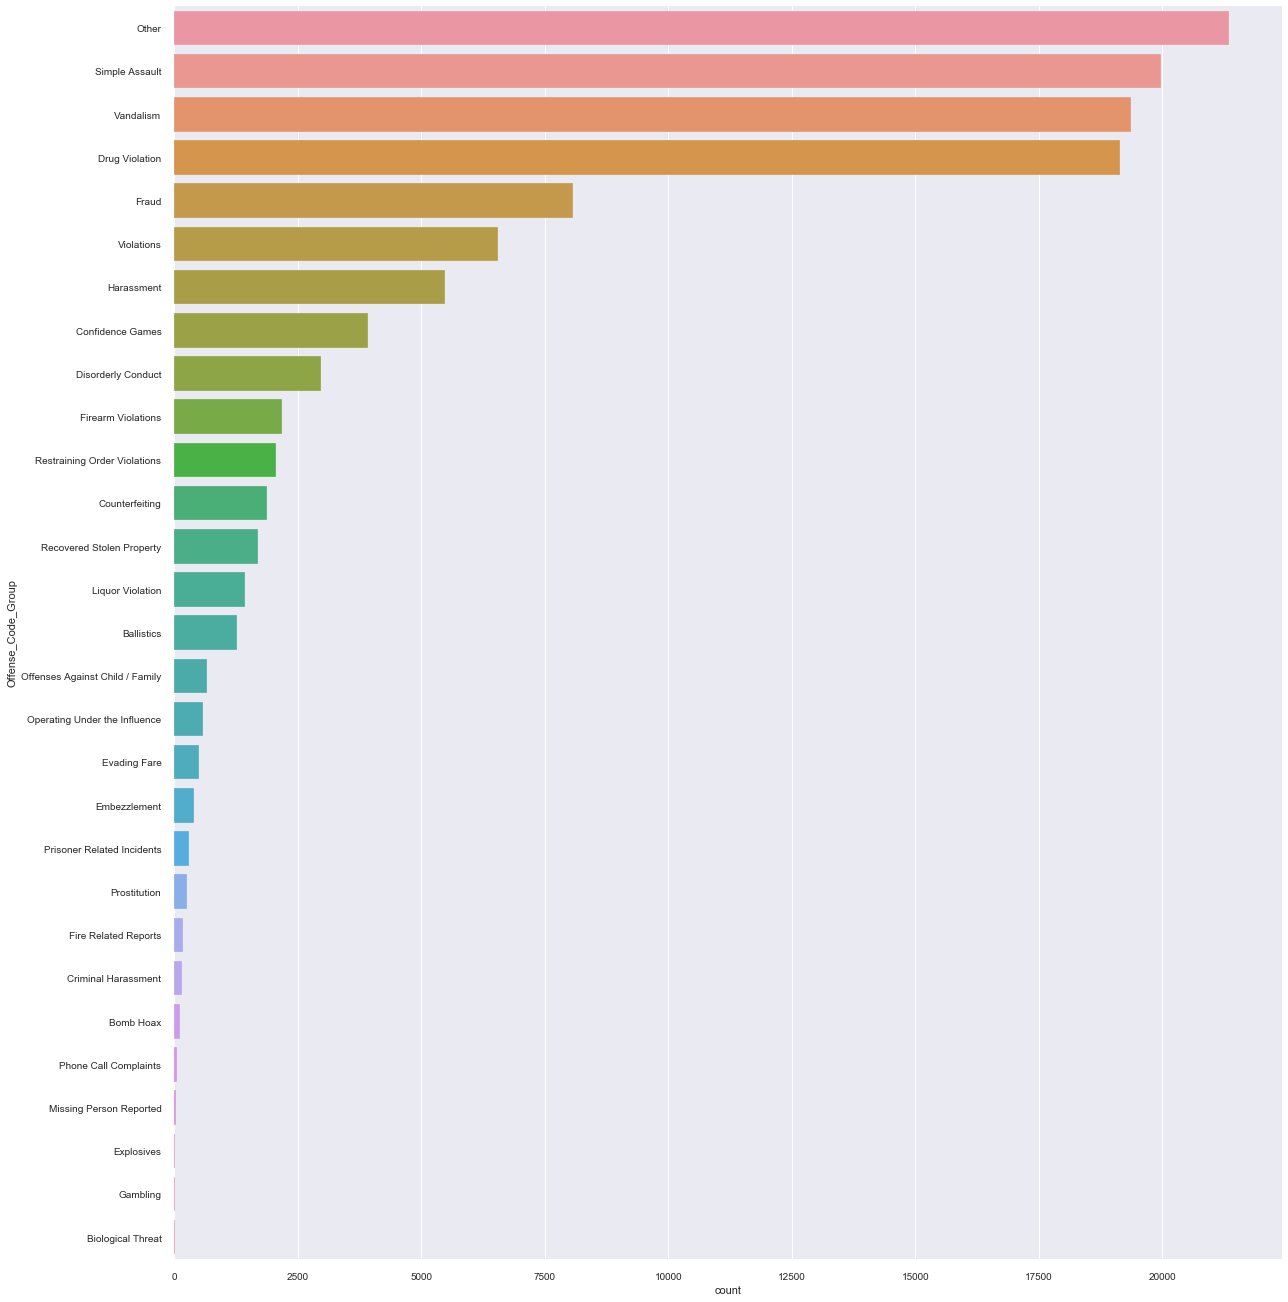

In [37]:
dfUCRParttwo = dfcrime[dfcrime.Ucr_Part == 'Part Two']
ax = sns.catplot(y='Offense_Code_Group',kind='count',height=18,order=dfUCRParttwo.Offense_Code_Group.value_counts().index,data=dfUCRParttwo)
plt.ylabel('Offense_Code_Group')
plt.savefig('Sns Plot for UCR type Part Two offencee count')

> From the above sns plot it is clear it **other,Simple Assault,Vandalism** is most frequent crime in Boston under **Part Two** UCR category crimes.

<a id=section5030202></a>
### 5.3.2 In Which District of Boston Other,Simple Assault,Vandalism crime count is high?

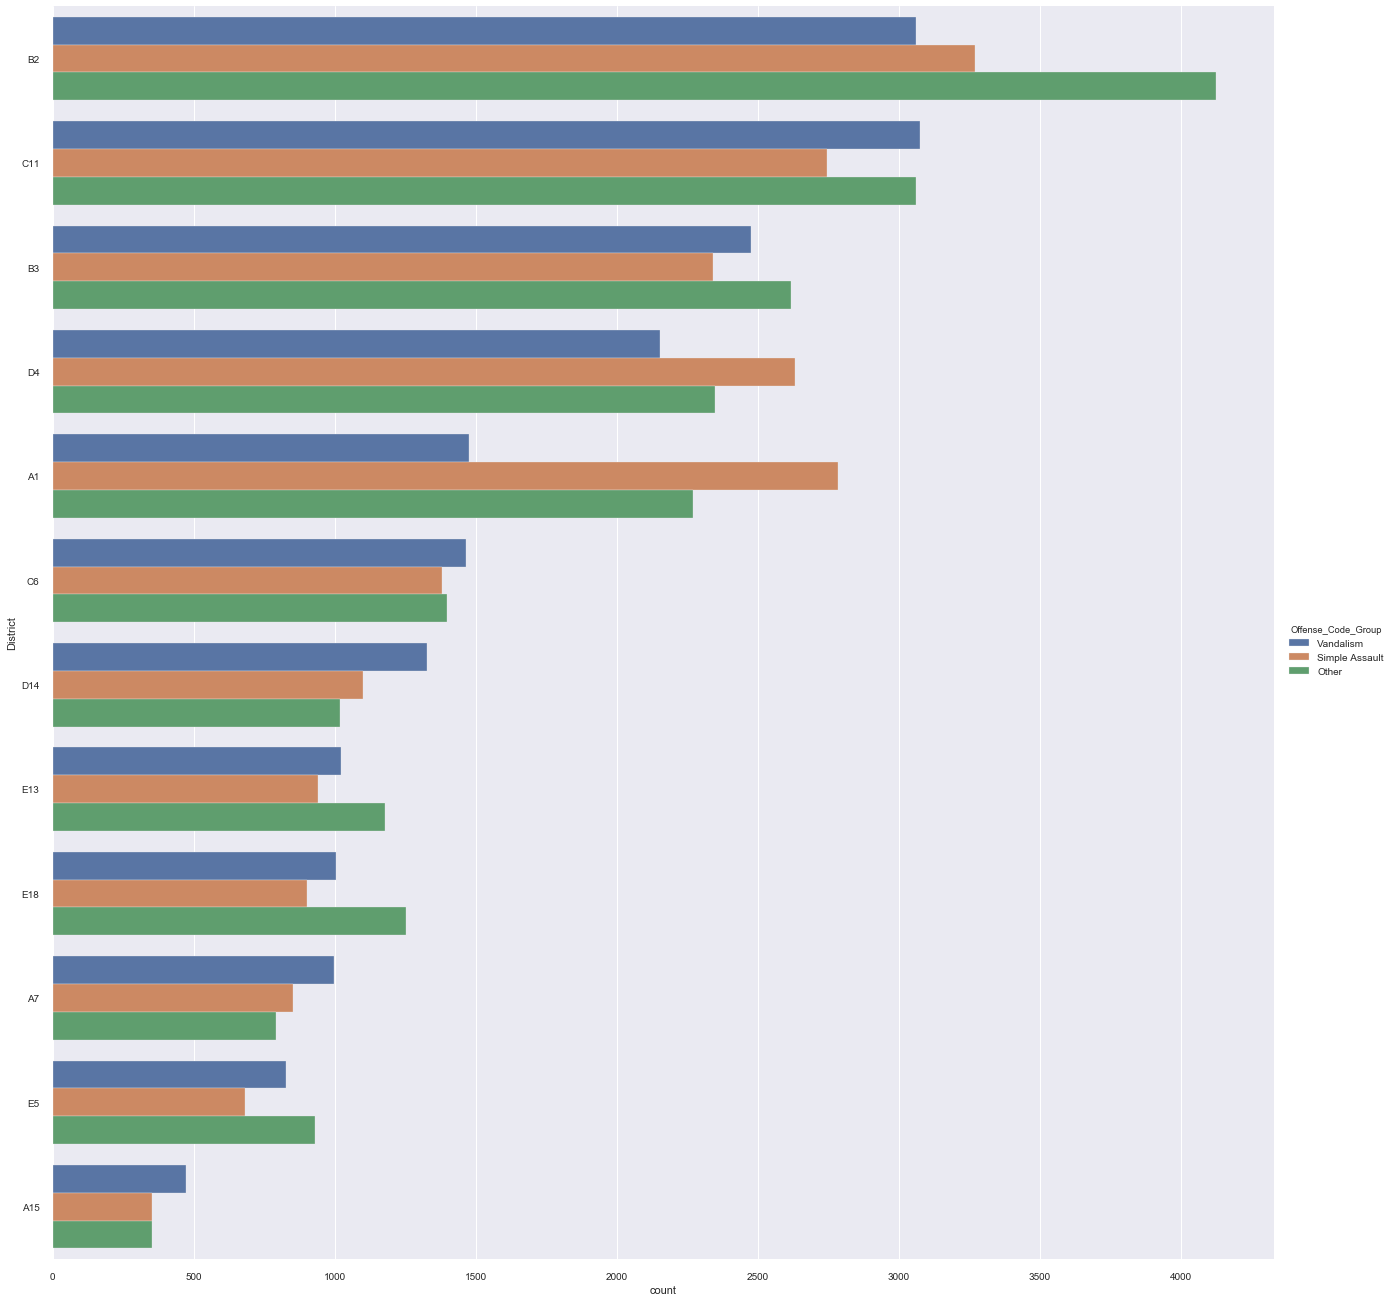

In [38]:
dfSimpleAssault_Vandalism = dfUCRParttwo[dfUCRParttwo.Offense_Code_Group. isin(['Other','Simple Assault','Vandalism'])]
sns.catplot(y='District',kind='count',height=18,order=dfUCRParttwo.District.value_counts().index,data=dfSimpleAssault_Vandalism,hue = 'Offense_Code_Group')

> Other,Simple Assault & Vandalism offense is high in B2 and C11 district

<a id=section50303></a>
### 5.3.3 In Which Year the UCR Part Two Crime rate is hign in Boston?


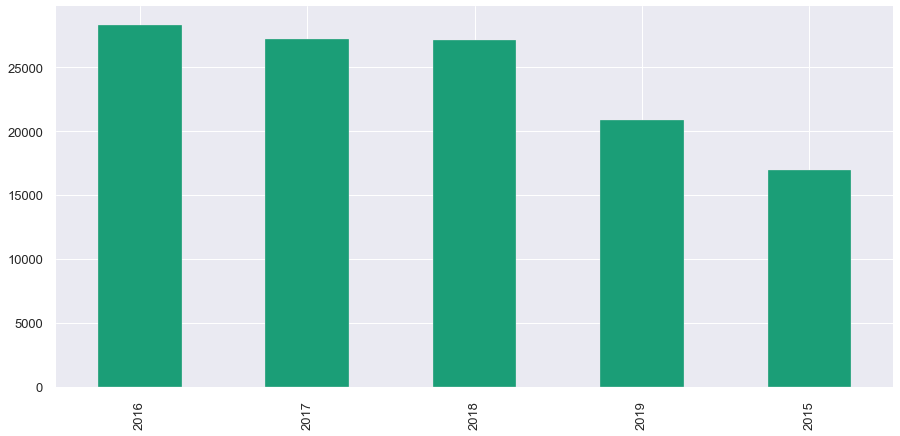

In [39]:
dfUCRParttwo['Year'].value_counts().plot(kind = 'bar',figsize=(15,7), colormap='Dark2', fontsize=13)

> From the above graph we get an insight that in **2016 the UCR Part two crime rate is high**. 
We have seen before that **UCR Part One crime is also high in 2016.**
This gives us an insight that in **2016 overall the crime rate is high in Boston as compared to other years**



<a id=section50304></a>
### 5.3.4 In Which Month the UCR Part Two Crime rate is hign in Boston?


Text(-7.074999999999974, 0.5, 'Count')

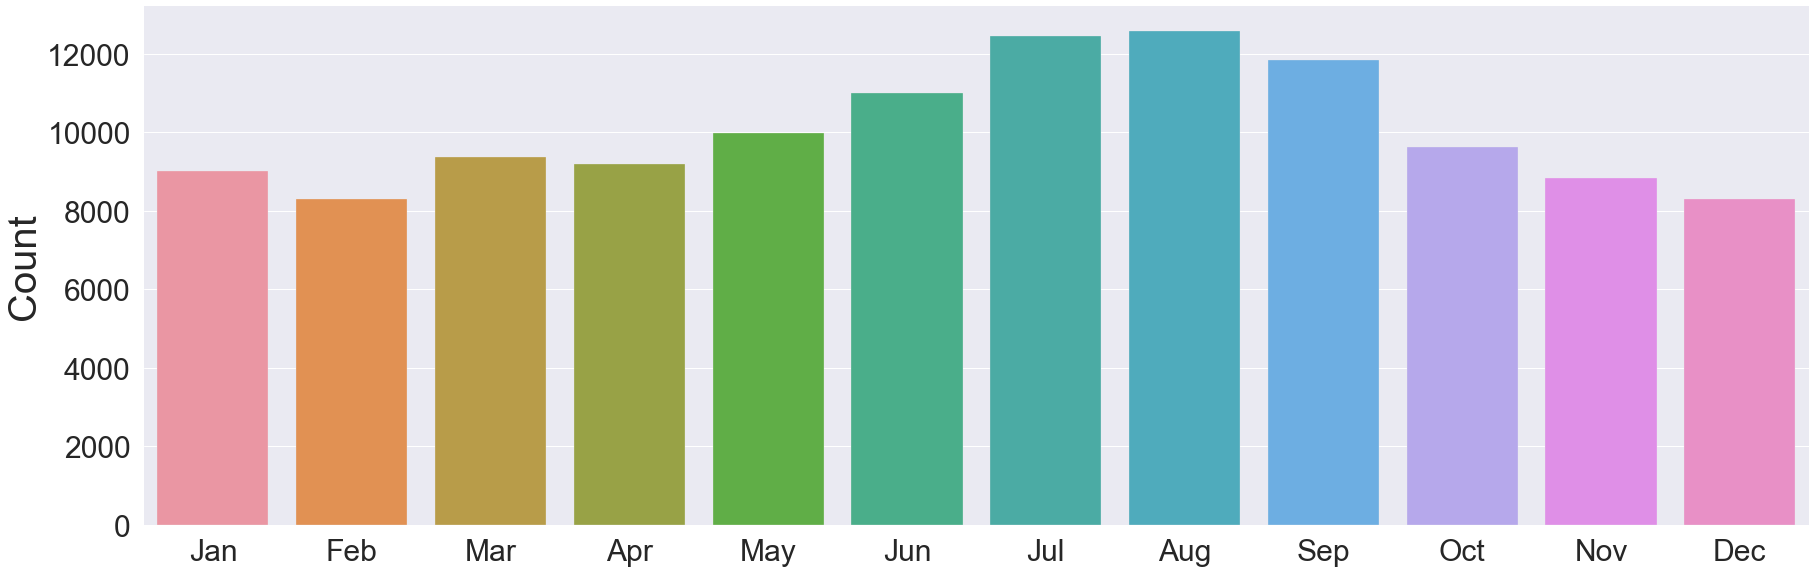

In [40]:

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='Month',kind='count',height=8,aspect=3,data=dfUCRParttwo)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

> During Summer from **Jun to sep** Part Two types of crime rate is **high** in Boston.

<a id=section50305></a>
### 5.3.5 In Which day of year the UCR Part Two Crime rate is hign in Boston?

Text(-7.074999999999974, 0.5, 'Count')

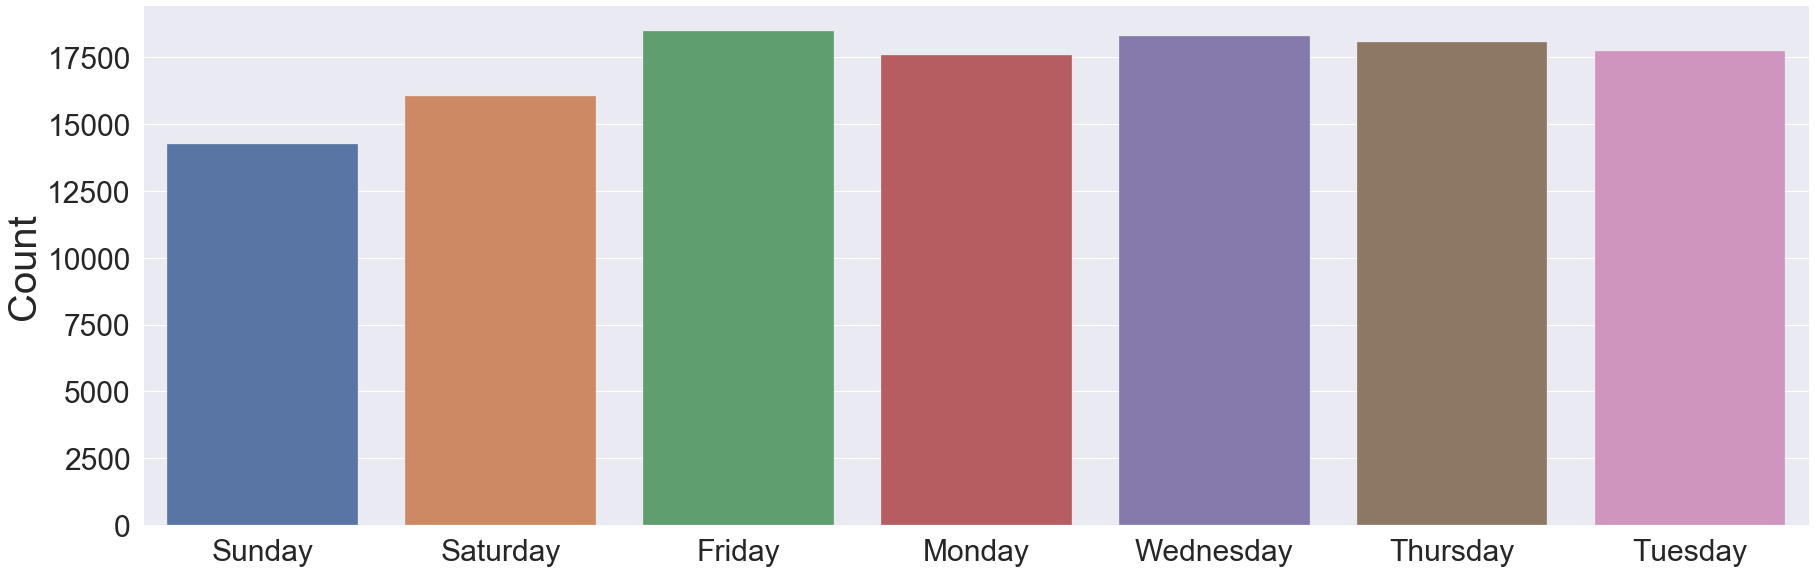

In [41]:
sns.catplot(x='Day_Of_Week',kind='count',height=8,aspect=3,data=dfUCRParttwo)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

 > For UCR Part Two Crimes also  **Friday** having the **highest crime rate** and **Sunday** having the lowest.


<a id=section50306></a>
### 5.3.6 During which Hour of the date UCR Part Two Crime rate is hign in Boston?



Text(-1.4499999999999744, 0.5, 'Count')

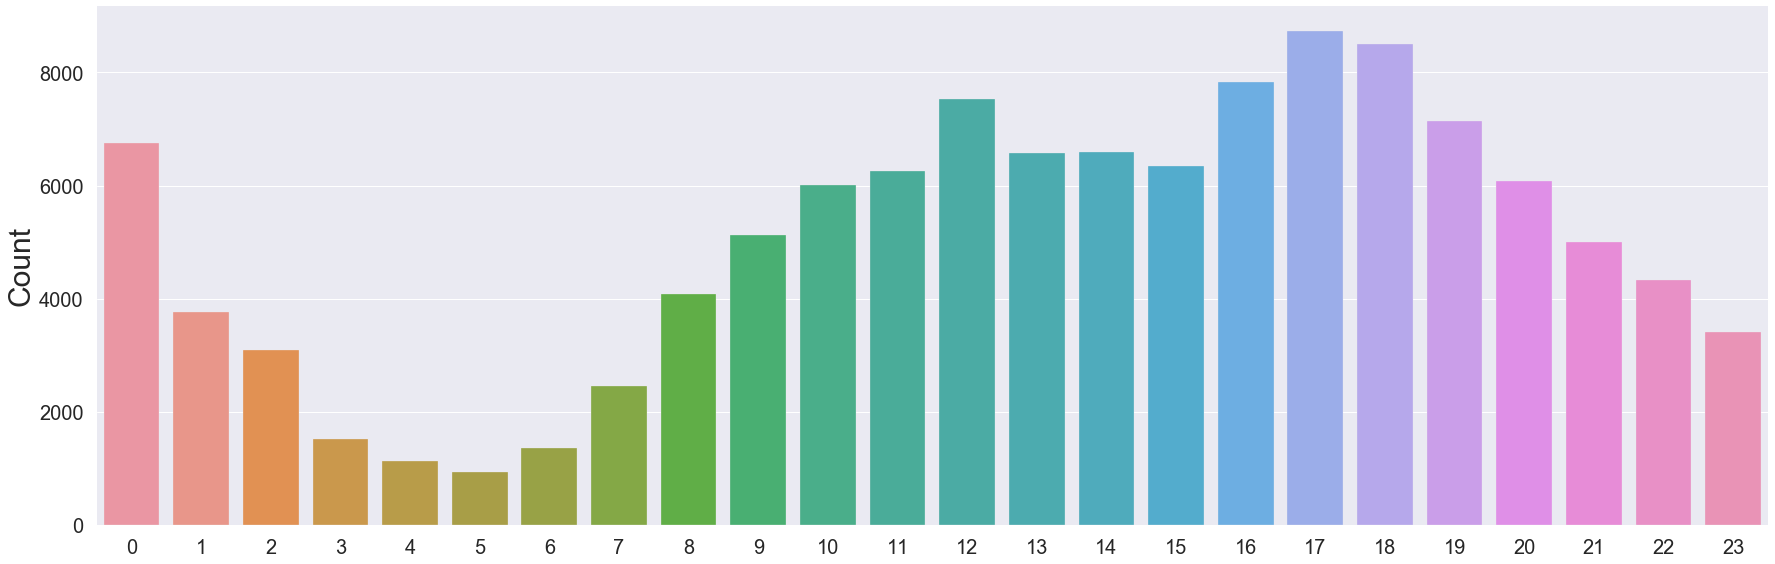

In [42]:
sns.catplot(x='Hour',kind='count',height=8,aspect=3,data=dfUCRParttwo)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=30)

> UCR Part Two Crimes rates are low between **1-8 in the morning**, and gradually rise throughout the day. Crime rate is at **peak time during evening which is between 4 pm - 7Pm** . 

<a id=section504></a>
## 5.4 Detailed analysis of UCR Part Three types of the Crime.
 
 
 <a id=section50401></a>
### 5.4.1 Which is Offence is most common/Frequent Under UCR Part Three Crime of Boston?

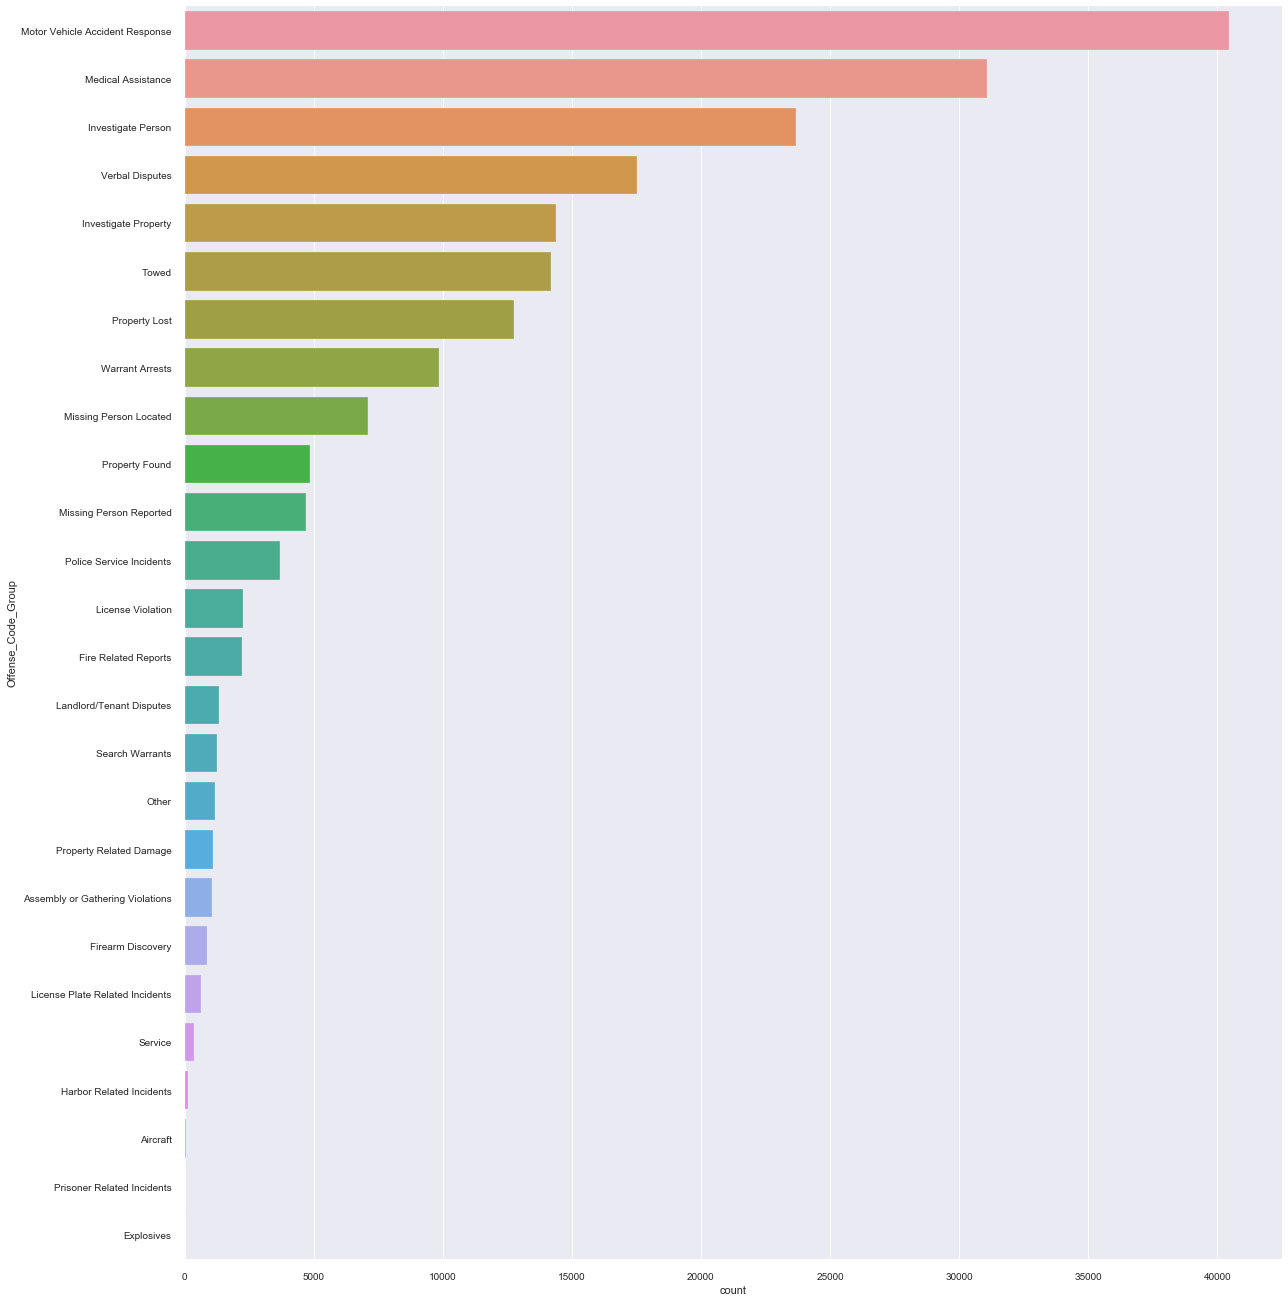

In [43]:

dfUCRPartThree = dfcrime[dfcrime.Ucr_Part == 'Part Three']
ax = sns.catplot(y='Offense_Code_Group',kind='count',height=18,order=dfUCRPartThree.Offense_Code_Group.value_counts().index,data=dfUCRPartThree)
plt.ylabel('Offense_Code_Group')
plt.savefig('Sns Plot per UCR type Part One offense count')

> **Motor Vehicle Accident Response** is the most frequent UCR Part Three type of Crime.

<a id=section5040202></a>
### 5.4.2 In Which District of Boston Motor Vehicle Accident Reposne crime count is high?

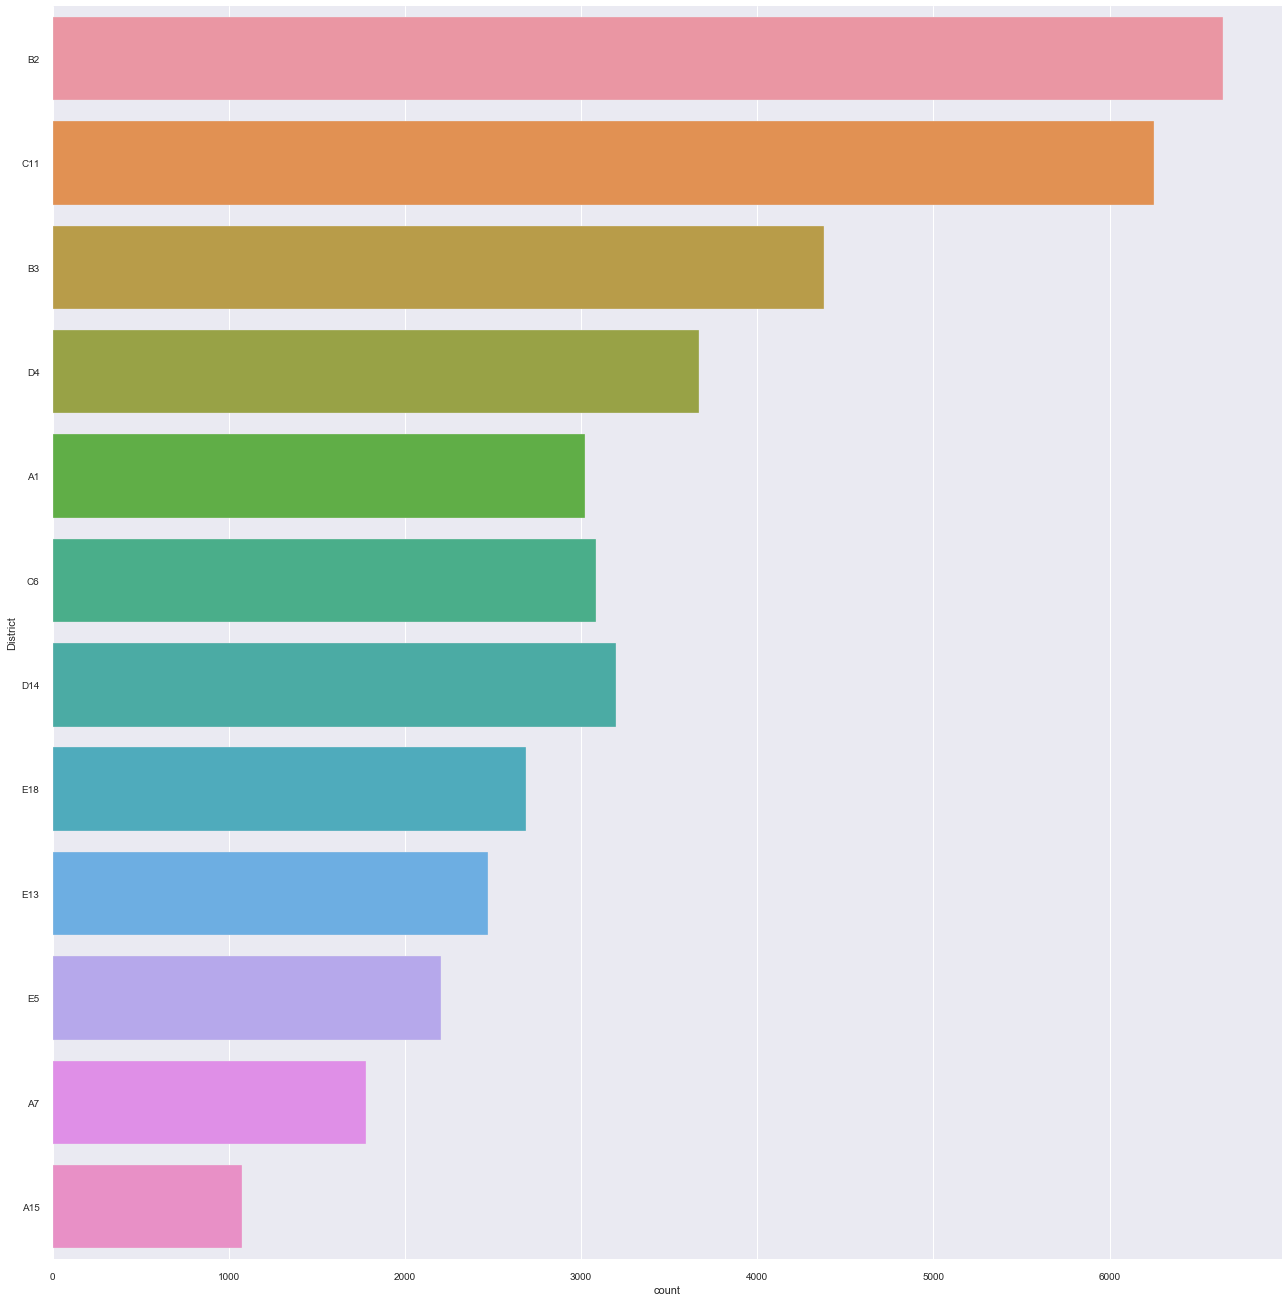

In [44]:

DfMotorAccident = dfUCRPartThree[dfUCRPartThree.Offense_Code_Group=='Motor Vehicle Accident Response']
sns.catplot(y='District',kind='count',height=18,order=dfUCRPartThree.District.value_counts().index,data=DfMotorAccident)

> **Motor Vehicle Accident Response** Crime is high in B2 and C11 district


<a id=section50403></a>
### 5.4.3 In Which Year the UCR Part Three Crime rate is hign in Boston?

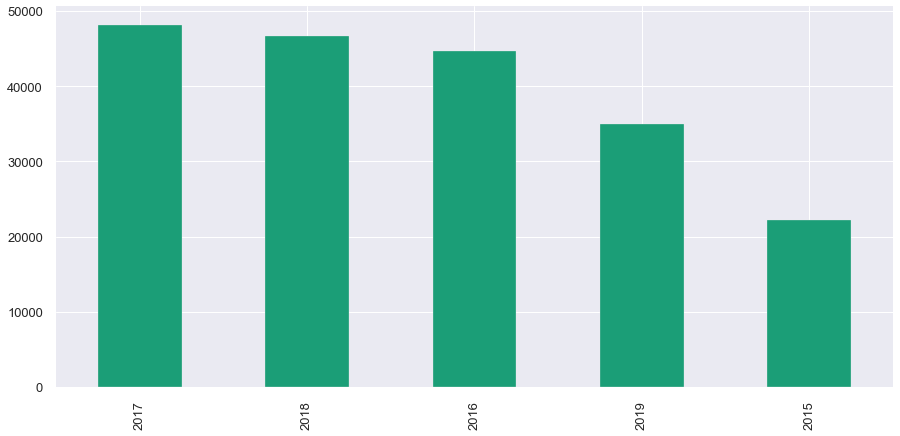

In [45]:

dfUCRPartThree['Year'].value_counts().plot(kind = 'bar',figsize=(15,7), colormap='Dark2', fontsize=13)

> From the above graph we get an insight that in **2017 the UCR Part Three Crime** rate is**high** as compared to other **two category crimes**


<a id=section50404></a>
### 5.4.4 In Which Month the UCR Part Three Crime rate is hign in Boston?

Text(-7.074999999999974, 0.5, 'Count')

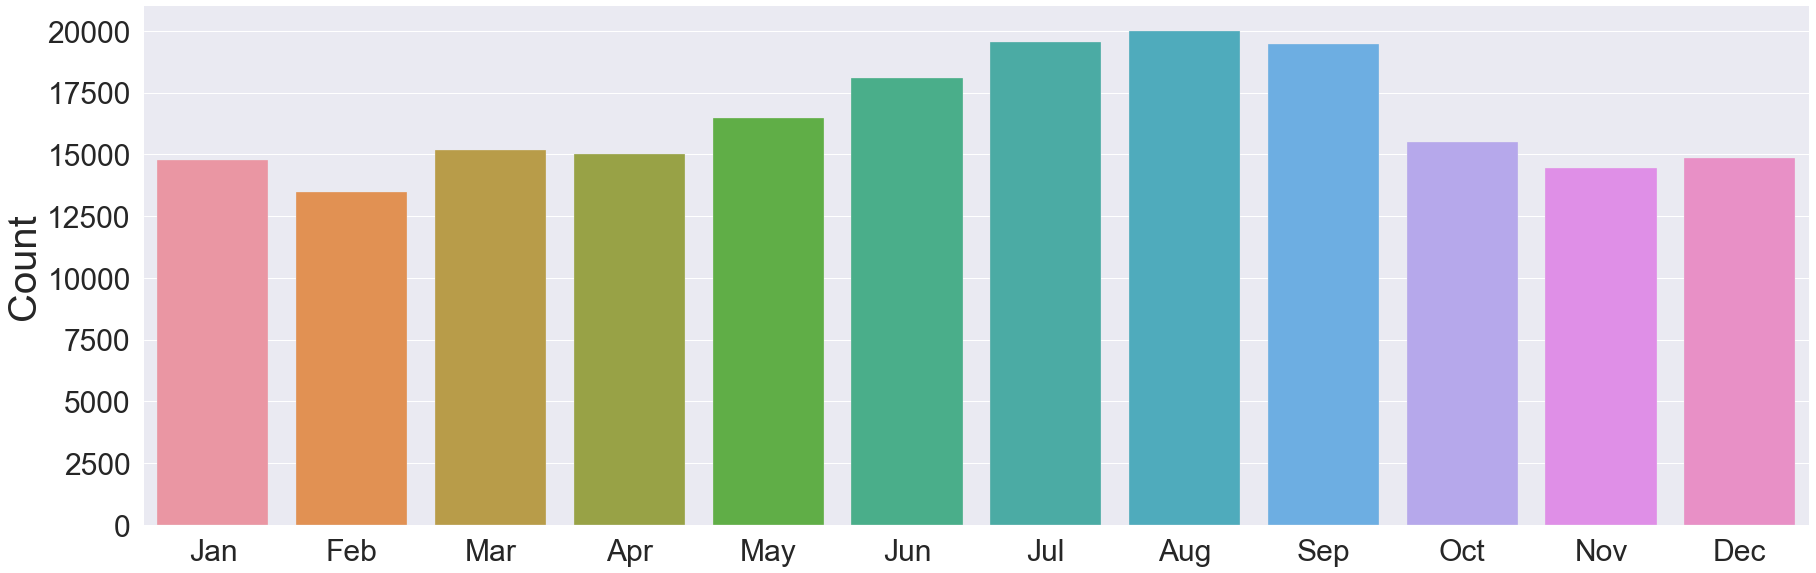

In [46]:

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='Month',kind='count',height=8,aspect=3,data=dfUCRPartThree)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

> During Summer from **Jun to sep** Part Three types of crime rate is **high** in Boston.


<a id=section50405></a>
### 5.4.5 In Which day of year the UCR Part Three Crime rate is hign in Boston?

Text(-6.949999999999974, 0.5, 'Count')

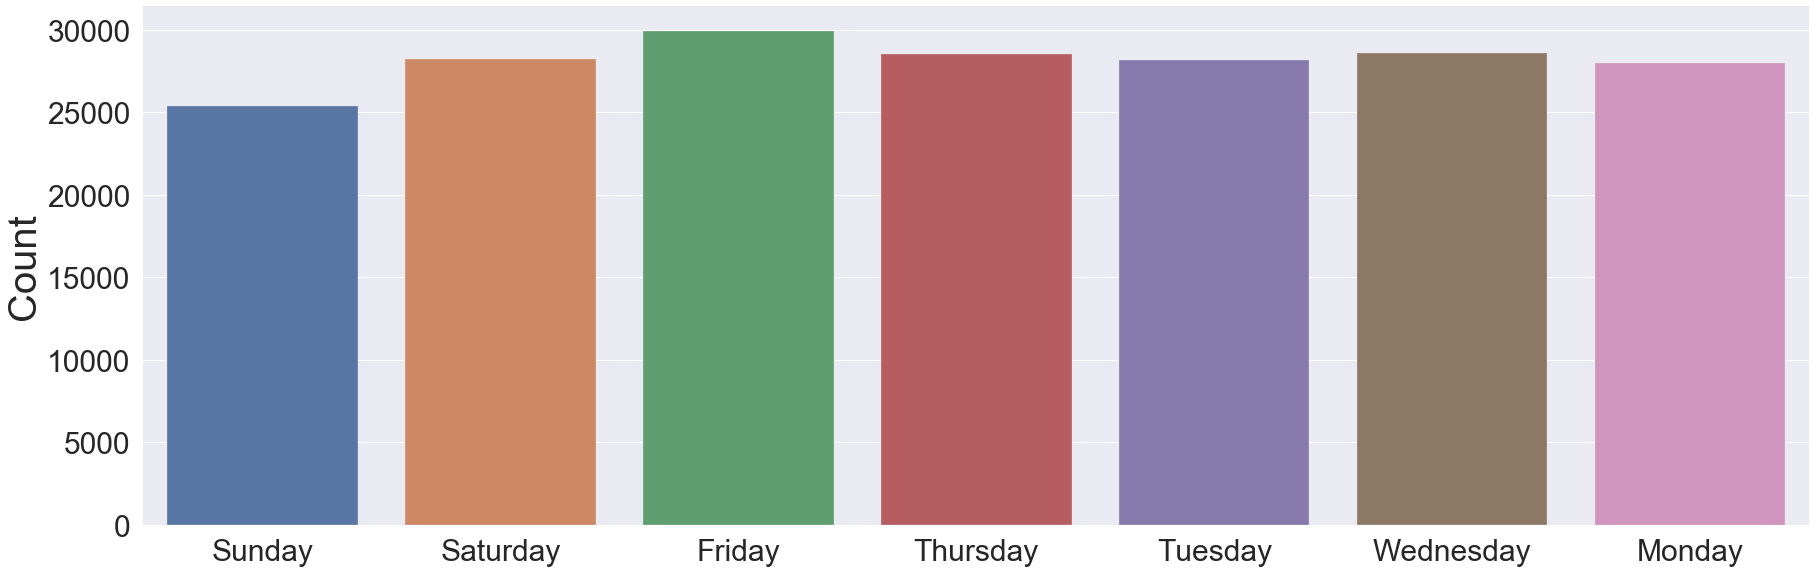

In [47]:

sns.catplot(x='Day_Of_Week',kind='count',height=8,aspect=3,data=dfUCRPartThree)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

In [48]:
On Friday the crime rate slightly high than other days. on Sunday the crime rate lowest of the week.

SyntaxError: invalid syntax (<ipython-input-48-49801584ea72>, line 1)


<a id=section50406></a>
### 5.4.6 During which Hour of the date UCR Part Three Crime rate is hign in Boston?

In [ ]:

sns.catplot(x='Hour',kind='count',height=8,aspect=3,data=dfUCRPartThree)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=30)

> UCR Part Three Crimes rates are **low** between **1-8** in the **morning**, and gradually rise throughout the day. Crime rate is at peak time during evening which is between **4 pm - 7Pm** . Same as for other two categories of UCR type crime we have seen above

## Conclusion
UCR part one, two and three crimes are high in summer, on friday during 4-7PM.
partn 1 & two are high in 2016 and part 3 is high in 2017